Intention of this notebook is to see if any high risk CDM issued by SOCRATES "disappear" before the TCA.  Exploring this because we may use this to find that satellites did maneuver
===

In [54]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np


path = '../../data/socrates/'
files = [ (match[0],match[1]) for f in listdir(path) if isfile(join(path, f))  if (match:=re.search('^socrates_([0-9]{14})\.csv(\.gz)?$', f))]
files

# Build single dataset
odf = pd.DataFrame()
for file,date in files:
    tmp_df = pd.read_csv(path + file)
    odf = pd.concat([odf,tmp_df])
    
odf = odf[odf.max_prob != 1]
odf = odf[odf.rel_velo_kms > 0.2]
odf = odf.set_index(["sat1_norad","sat2_norad"])
odf['tca_time'] = odf['tca_time'].astype('datetime64[ns]')
odf['extract_date'] = odf['extract_date'].astype('datetime64[ns]')

In [61]:
last_extract_date = max(df['extract_date'])

df = odf

# has active satellites [+] as 1 of the 2 objects
df["has_active"] = df.sat1_name.str.contains("[+]") | df.sat2_name.str.contains("[+]")

# only show entries from MAXPROB SOCRATES and TCA before last extract date from data
df = df[(df.extract_sort == "MAXPROB") & (df.tca_time < last_extract_date)][:]

df["countdown_to_tca"] = (df.extract_date - df.tca_time) / np.timedelta64(1, 'D')


<AxesSubplot:ylabel='Frequency'>

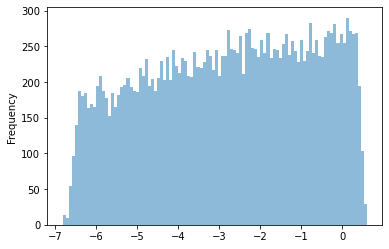

In [62]:
df.countdown_to_tca.plot.hist(bins=100, alpha=0.5)

In [49]:
df.countdown_to_tca.astype('int64')

sat1_norad  sat2_norad
11165       27432          27034097887000
20436       23318          19831647887000
25489       36493          18486821887000
40028       42562          34061442887000
25489       17719           9776328887000
                               ...       
23342       18959          15551224023000
42829       38189        -225748006977000
24944       45862          10850716023000
45438       31839        -151872153977000
25042       42507        -109736189977000
Name: countdown_to_tca, Length: 21630, dtype: int64